In [1]:
import numpy as np
import pylab as plt
import planet_search as ps

In [3]:
# just do it
tic = 98796344 # ltt 1445
#tic = 318022259 # toi-1730
#tic = 307210830  # l 98-59
#tics = [101955023,288314668,16530308,289972535,402313808]  # Kristo'S FAP calculation
#for i in range(1,len(tics)):

ts = ps.run_full_planet_search(tic, use_20sec=0, window_length_hrs=4)

  0%|          | 0/2449 periods | 00:00<?

Running TLS for planet 1 (sector(s) 4)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 14697 data points, 2449 periods from 0.601 to 17.998 days
Using all 8 CPU threads


100%|██████████| 2449/2449 periods | 00:21<00:00
  2%|▏         | 174/10350 [00:00<00:05, 1739.79it/s]

Searching for best T0 for period 5.35592 days


100%|██████████| 10350/10350 [00:03<00:00, 3299.54it/s]
  0%|          | 0/2449 periods | 00:00<?

Running TLS for planet 2 (sector(s) 4)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 14477 data points, 2449 periods from 0.601 to 17.998 days
Using all 8 CPU threads


100%|██████████| 2449/2449 periods | 00:20<00:00
  2%|▏         | 171/9400 [00:00<00:05, 1706.15it/s]

Searching for best T0 for period 3.12370 days


100%|██████████| 9400/9400 [00:02<00:00, 3817.51it/s]
  0%|          | 0/2449 periods | 00:00<?

Running TLS for planet 3 (sector(s) 4)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 14206 data points, 2449 periods from 0.601 to 17.998 days
Using all 8 CPU threads


100%|██████████| 2449/2449 periods | 00:16<00:00
  2%|▏         | 190/10369 [00:00<00:05, 1894.32it/s]

Searching for best T0 for period 7.21902 days


100%|██████████| 10369/10369 [00:02<00:00, 4367.34it/s]
  0%|          | 0/2432 periods | 00:00<?

Running TLS for planet 1 (sector(s) 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 16519 data points, 2432 periods from 0.601 to 17.983 days
Using all 8 CPU threads


100%|██████████| 2432/2432 periods | 00:23<00:00
  1%|▏         | 169/12514 [00:00<00:07, 1681.01it/s]

Searching for best T0 for period 5.36184 days


100%|██████████| 12514/12514 [00:03<00:00, 3961.48it/s]
  0%|          | 0/2432 periods | 00:00<?

Running TLS for planet 2 (sector(s) 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 16311 data points, 2432 periods from 0.601 to 17.983 days
Using all 8 CPU threads


100%|██████████| 2432/2432 periods | 00:22<00:00
  1%|          | 181/16311 [00:00<00:08, 1806.11it/s]

Searching for best T0 for period 12.67109 days


100%|██████████| 16311/16311 [00:03<00:00, 4504.65it/s]
  0%|          | 0/2432 periods | 00:00<?

Running TLS for planet 3 (sector(s) 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 16179 data points, 2432 periods from 0.601 to 17.983 days
Using all 8 CPU threads


100%|██████████| 2432/2432 periods | 00:20<00:00
  0%|          | 0/2432 periods | 00:00<?

Running TLS for planet 4 (sector(s) 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 14502 data points, 2432 periods from 0.601 to 17.983 days
Using all 8 CPU threads


100%|██████████| 2432/2432 periods | 00:16<00:00
  1%|          | 173/14502 [00:00<00:08, 1720.64it/s]

Searching for best T0 for period 3.12477 days


100%|██████████| 14502/14502 [00:03<00:00, 4106.49it/s]
  0%|          | 0/2432 periods | 00:00<?

Running TLS for planet 5 (sector(s) 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 40 durations
Searching 14350 data points, 2432 periods from 0.601 to 17.983 days
Using all 8 CPU threads


100%|██████████| 2432/2432 periods | 00:15<00:00
  2%|▏         | 198/12587 [00:00<00:06, 1973.41it/s]

Searching for best T0 for period 8.77760 days


100%|██████████| 12587/12587 [00:02<00:00, 4774.02it/s]
/Users/ryancloutier/anaconda3/envs/myenv/lib/python3.8/site-packages/transitleastsquares/main.py:407: UserWarning: 1 of 3 transits without data. The true period may be twice the given period.
  warnings.warn(text)


(1844.4, 1844.7)

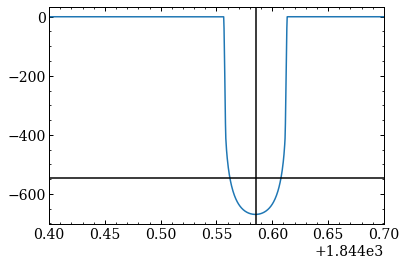

In [70]:
plt.plot(ts.tls.results_2_s20['model_lightcurve_time']-2457e3, 
         1e6*(ts.tls.results_2_s20['model_lightcurve_model']-1))
plt.axvline(ts.tls.results_2_s20['T0']-2457e3, color='k')
plt.axhline(-1e6*(1-ts.tls.results_2_s20['depth_mean'][0]), color='k')

plt.xlim((1844.4,1844.7))

In [8]:
ts.tls.results_1_s20.keys()

dict_keys(['SDE', 'SDE_raw', 'chi2_min', 'chi2red_min', 'period', 'period_uncertainty', 'T0', 'duration', 'depth', 'depth_mean', 'depth_mean_even', 'depth_mean_odd', 'transit_depths', 'transit_depths_uncertainties', 'rp_rs', 'snr', 'snr_per_transit', 'snr_pink_per_transit', 'odd_even_mismatch', 'transit_times', 'per_transit_count', 'transit_count', 'distinct_transit_count', 'empty_transit_count', 'FAP', 'in_transit_count', 'after_transit_count', 'before_transit_count', 'periods', 'power', 'power_raw', 'SR', 'chi2', 'chi2red', 'model_lightcurve_time', 'model_lightcurve_model', 'model_folded_phase', 'folded_y', 'folded_dy', 'folded_phase', 'model_folded_model'])

In [22]:
np.sum((ts.tls.results_1_s20.model))

11.94702551912365

In [74]:
ts.tls.results_3_s20['SDE']

6.038006567135947

In [54]:
ts.tls.